# Least Squares Approximation

In this lab you will:

- Implement Least Squares Approximation for predicting the salary of a person using the work experience expressed in years.


1. Load the `numpy`, `pandas` and `matplotlib.pyplot`  libraries into memory. After `import matplotlib.pyplot as plt`, include this line for fancy plots: `plt.style.use(['ggplot'])`.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

2. Load the CSV file `salary_data.csv` into a Pandas dataframe. Name the dataframe variable something unique, like 'data' or 'df'. Remember that for CSV files, there's a built-in Pandas function for reading their data.


In [36]:
df = pd.read_csv("salary_data.csv")

3. Print the top 4 rows of the dataframe. Utilize Pandas' built-in functions for this!

In [37]:
df.head(n = 5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


4. Create a scatter plot with the number of years in the x-axis and salary on the y-azis. If you've done everything up to this point correctly, it should look like the following image:

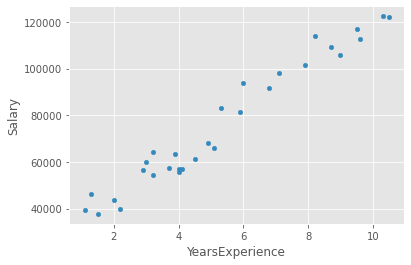

<Axes: xlabel='YearsExperience', ylabel='Salary'>

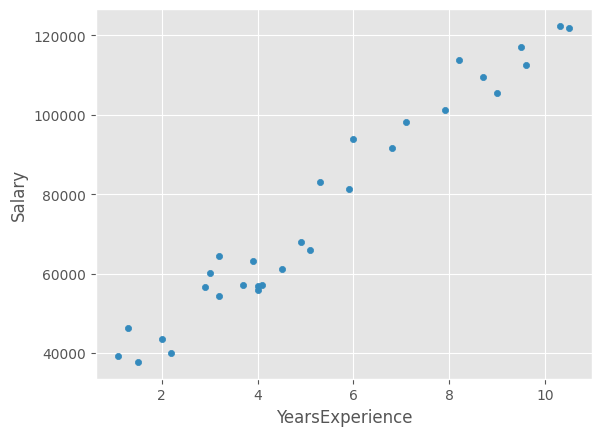

In [38]:
df.plot(kind ="scatter", x = "YearsExperience", y = "Salary")

5. Implement the Least Squares approximation, to find a straight line that best approximates the data we've been provided with and plotted in the previous question. We'll be implementing this system manually - you're **not** allowed to use an external library like `numpy.linalg` to solve. You will, however, want to use the `numpy` constructions for numbers and matrices we already imported to manipulate your data.

    > As a refresher, the Least Squares Approximation finds values $\theta_0, \theta_1$ such that $y = \theta_0 + \theta_1x$ is an accurate approximation of the trend of the data provided. In our example, $x$ corresponds to years of experience and $y$ the corresponding salary of a person.
    >
    > In matrix form:
    > $$A = [1 , X]$$
    >
    > $A$ can be thought of as a column of $1$'s and a column of sample $x$ values. Then, we define $\theta$ as:
    >
    > $$\theta = [\theta_0, \theta_1]^T$$
    >
    > So $b = A \theta$
    >
    > To find the approximate result, we can use the pseudo-inverse of A:
$$\theta = [(A^T A)^{(-1)} A^T] b$$

In [39]:
X = df.YearsExperience
y = df.Salary
A = np.c_[np.ones((X.size,1)),X]
theta = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
print('Theta (analytical): [ {:0.3f} , {:0.3f} ]^T'.format(theta[0],theta[1]))

Theta (analytical): [ 25792.200 , 9449.962 ]^T


6. On top of the scatter plot you created in part **4**, we now want to use our calculated $\theta$ to draw our approximate linear regression onto the plot surface. Start with the plot from earlier, and then use the `matplotlib.pyplot.plot` function to plot the predicted line from an array of $x_{pred}$ and $y_{pred}$ predictions. You'll need to likely compute $A$ for each section of the line in order to compute $y_{pred}=A \cdot \theta$ for a given point - think about how you can use Numpy and matrices to calculate all of the points in the line at once!
    If you've correctly set up your least squares approximation, as the end result you should see something that looks like this:

    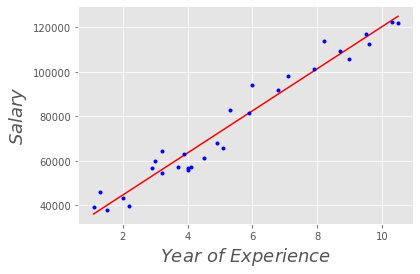

In [40]:
y_pred = A@theta

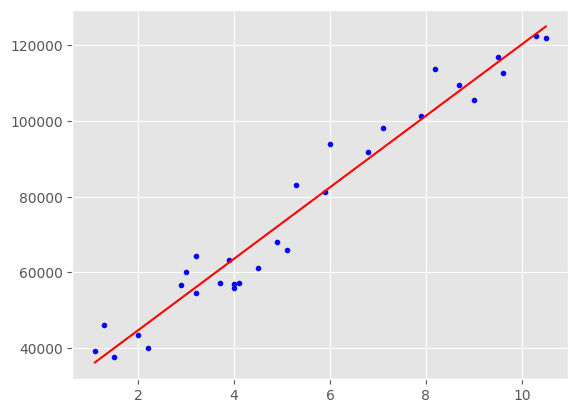

In [41]:
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, color = "r")